# Nonlinear Dimensionality Reduction (Manifold learning)

In [1]:
%matplotlib inline

In [4]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn import preprocessing
from sklearn.metrics import euclidean_distances
from math import log

In [5]:
sns.set(style='white')

Načtení dat a rovnoměrně náhodný výber podmnožiny vstupů. Metody nelinéární redukce dimenze vyžadují velké množstní paměti a není prakticky možné napočítat projektci pro všechny vstupy. 

In [6]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)

n = 13  # number of inputs
input_indices = list(range(n))
samples = 5000 # number of samples from whole dataset

y = d1[n]
d1_notscaled = d1[input_indices]
d1 = pd.DataFrame(preprocessing.scale(d1[input_indices])) # normalization across whole dataset
d1[n] = y

d1_subset = d1.sample(samples, random_state=4) # sample smaller subset
d1_notscaled = d1_notscaled.iloc[d1_subset.index]
y_notscaled = y.iloc[d1_subset.index]
print('rows, columns:', d1_subset.shape)
d1_subset.head()

rows, columns: (5000, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
42375,-1.404955,-0.627701,0.864366,1.372616,0.326747,-0.209645,-0.850981,1.088529,1.133142,0.795277,-0.578043,-0.506667,0.324909,0.5058
19419,0.765024,-1.670540,0.864650,-1.764699,0.299671,-0.024820,-0.629304,0.507699,-1.495180,0.132764,-0.282931,-0.620093,-0.259886,4.3421
21037,1.409905,0.840113,-0.153692,0.308910,-1.338128,0.176434,-1.175501,0.392030,0.362012,-1.190249,-0.135060,-1.061299,-0.750654,3.9140
16641,-0.865640,0.436517,-1.363772,-0.319564,-1.041066,-0.846022,-1.468865,-0.536738,-0.147276,-1.009014,-1.071897,-1.479694,0.049790,1.4063
32541,-0.606758,-0.907059,-0.170736,1.104605,-0.509522,-1.107193,0.199504,-0.579647,1.269912,-0.763341,-0.775205,0.442924,-0.574385,1.2011


In [7]:
x = d1_subset[input_indices]
# x = pd.DataFrame(preprocessing.scale(x)) # normalization across subset
x.index = d1_subset.index
y = d1_subset[n]

In [43]:
print(y.describe())

count    5000.000000
mean        5.729756
std        34.088846
min         0.080200
25%         0.925725
50%         2.433450
75%         4.293325
max      1474.450000
Name: 13, dtype: float64


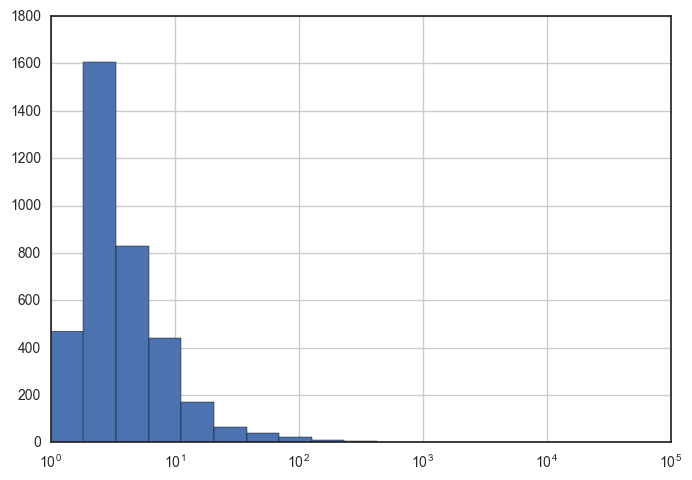

In [44]:
y.hist(bins=np.logspace(0, 5, 20))
plt.gca().set_xscale('log')

Metody nelineární reukde dimenze pracují se vzdáleností bodů ve vstupní vícerozměnném prostoru. Jednotlivé složky vstupu je potřena normalizovat, aby vzdálenost bodů v jedné dimenzi nepřebila vzdálenosti ve všech ostatních dimenzích.

[(-5.7929315716279417, 4.7920481258113838),

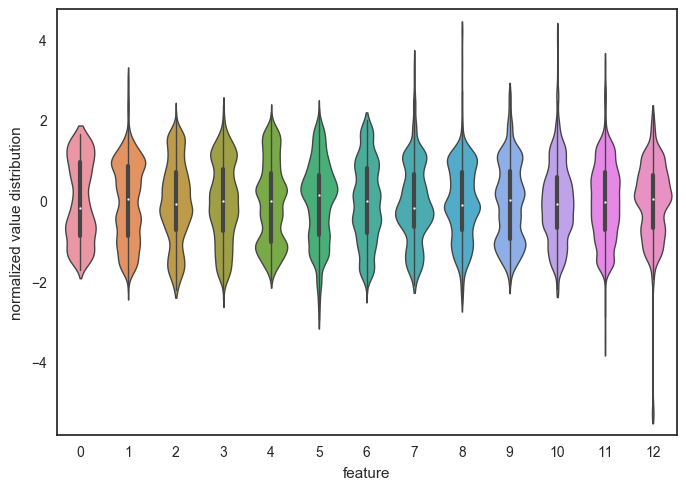

In [45]:
grid = sns.violinplot(data=x, bw=.2, cut=1, linewidth=1)
grid.set(ylim=(min(x.min())-0.5, max(x.max())+0.5), xlabel='feature', ylabel='normalized value distribution')

## Isomap

Metoda nelineární redikce dimenze založená na nejkratších vzdálenostech sousedů. Pro každý bod se nalezne jeho K nejbližších sousedů ve vstupním prostoru. Následně se spočítají nekratší cesty mezi těmito body. Samotná nízkodimenzionální projekce se pak snaží zachovat pomery mezi (euklidovskými) vzdálenost bodů ve vstupním prostoru.

In [46]:
isomap = Isomap(n_components=2, eigen_solver='dense', n_jobs=-1)
x_reduced_isomap = pd.DataFrame(isomap.fit_transform(x))

In [47]:
print('rows, columns:', x_reduced_isomap.shape)
x_reduced_isomap.head()

rows, columns: (5000, 2)


,0,1
0,-0.003138,0.000005
1,-0.004351,0.000006
2,-0.004228,0.000006
3,-0.004352,0.000006
4,-0.004334,0.000006


In [48]:
x_reduced_isomap.index = x.index
d_isomap = pd.concat([x_reduced_isomap, y, x], axis=1)
d_isomap.columns = ['x1', 'x2', 'y'] + ['f{}'.format(i) for i in x.columns]
d_isomap.head()

,x1,x2,y,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
42375,-0.003138,0.000005,0.5058,-1.404955,-0.627701,0.864366,1.372616,0.326747,-0.209645,-0.850981,1.088529,1.133142,0.795277,-0.578043,-0.506667,0.324909
19419,-0.004351,0.000006,4.3421,0.765024,-1.670540,0.864650,-1.764699,0.299671,-0.024820,-0.629304,0.507699,-1.495180,0.132764,-0.282931,-0.620093,-0.259886
21037,-0.004228,0.000006,3.9140,1.409905,0.840113,-0.153692,0.308910,-1.338128,0.176434,-1.175501,0.392030,0.362012,-1.190249,-0.135060,-1.061299,-0.750654
16641,-0.004352,0.000006,1.4063,-0.865640,0.436517,-1.363772,-0.319564,-1.041066,-0.846022,-1.468865,-0.536738,-0.147276,-1.009014,-1.071897,-1.479694,0.049790
32541,-0.004334,0.000006,1.2011,-0.606758,-0.907059,-0.170736,1.104605,-0.509522,-1.107193,0.199504,-0.579647,1.269912,-0.763341,-0.775205,0.442924,-0.574385


### Scatter Plot

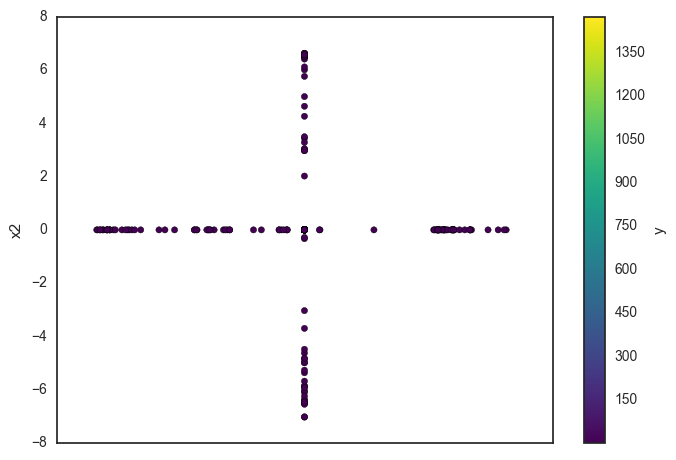

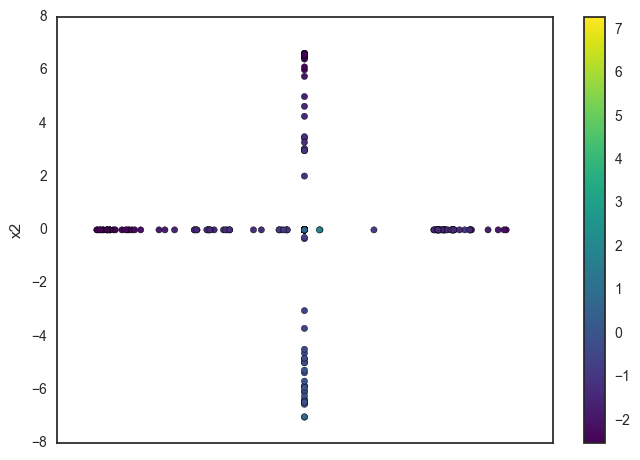

In [49]:
d_isomap.plot.scatter(x='x1', y='x2', c='y', cmap='viridis')
d_isomap.plot.scatter(x='x1', y='x2', c=d_isomap['y'].apply(log), cmap='viridis')

Níže je vizualizace závislosti hodnot featury (barva) na pozici v projekci pomocí Isomap.

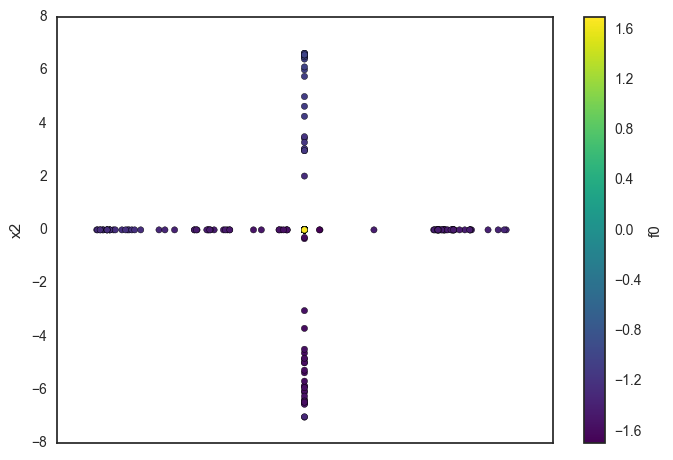

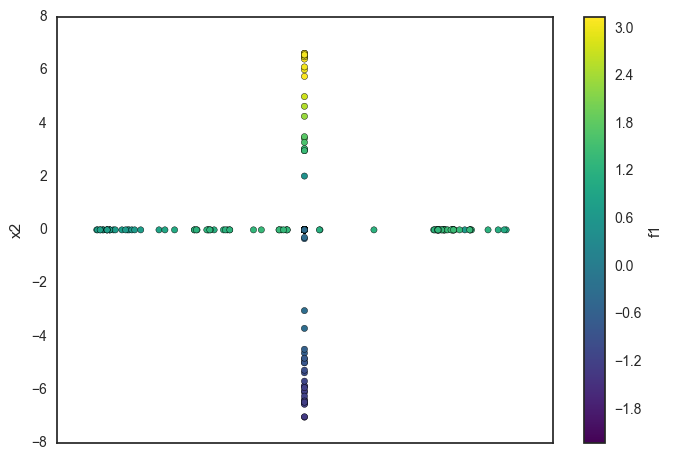

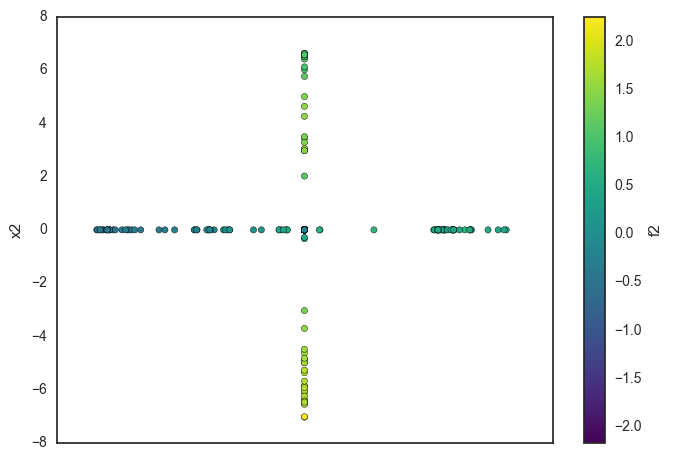

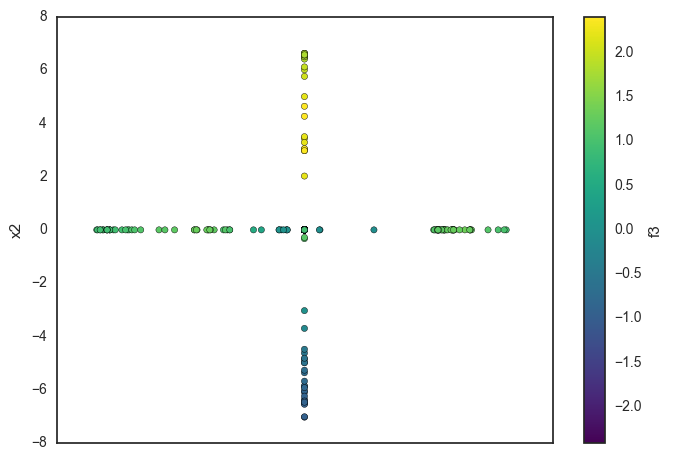

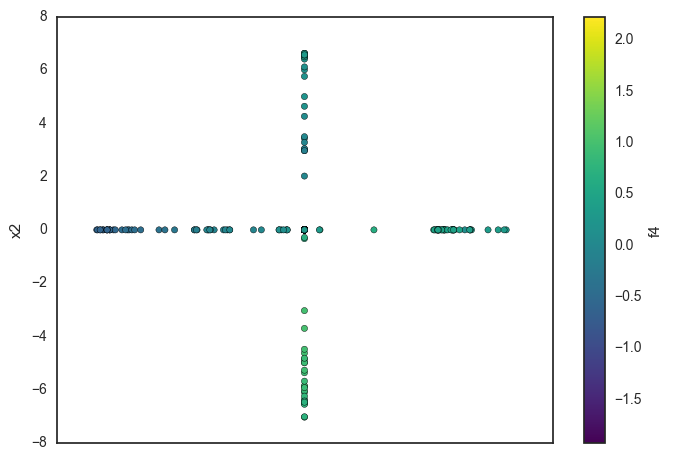

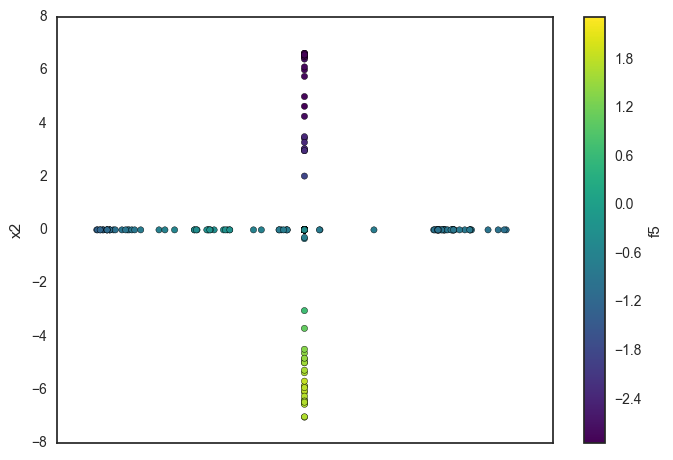

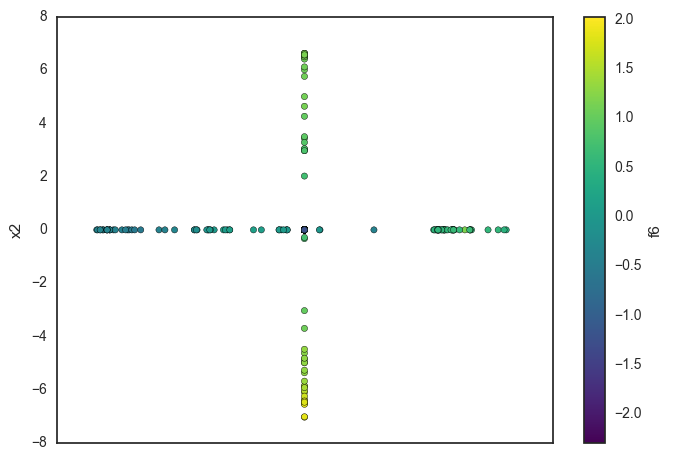

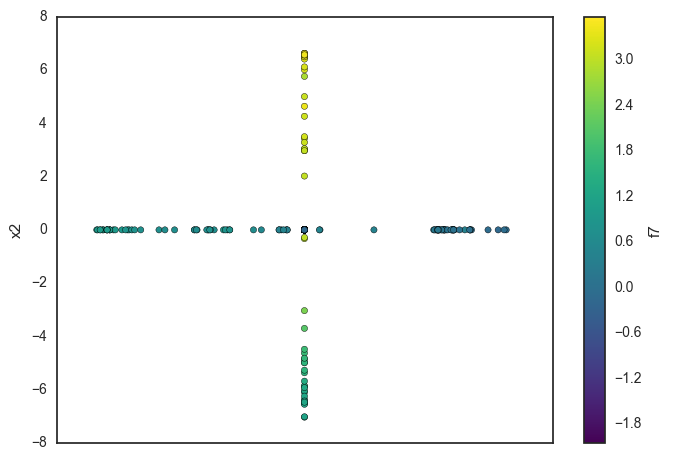

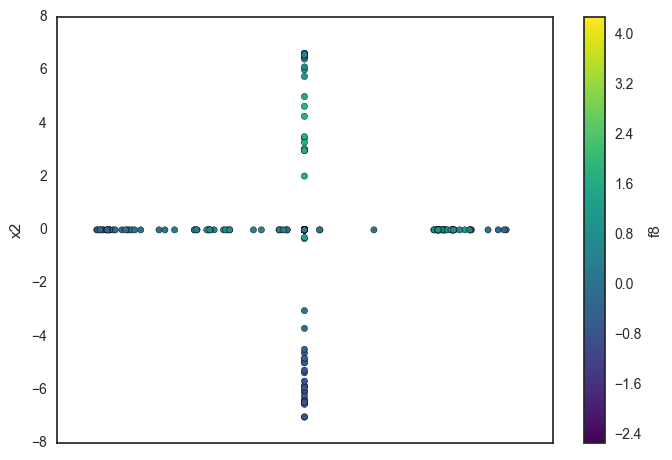

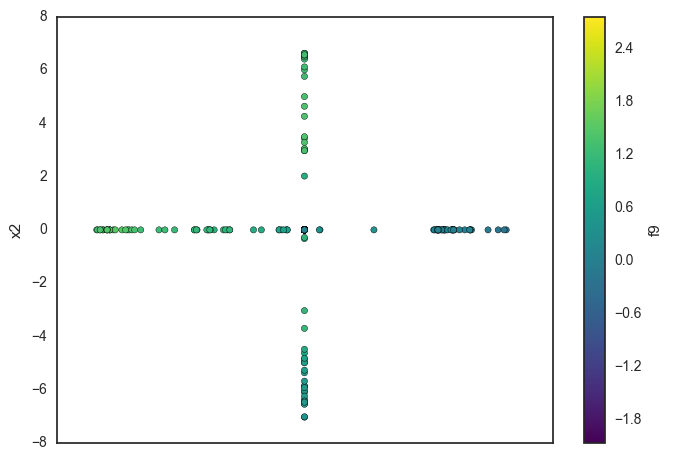

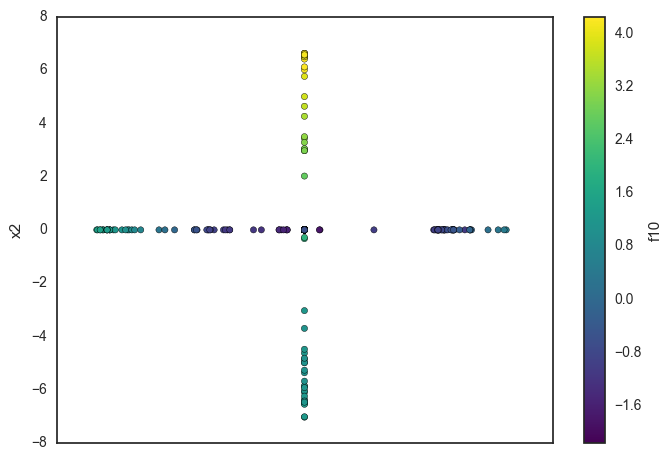

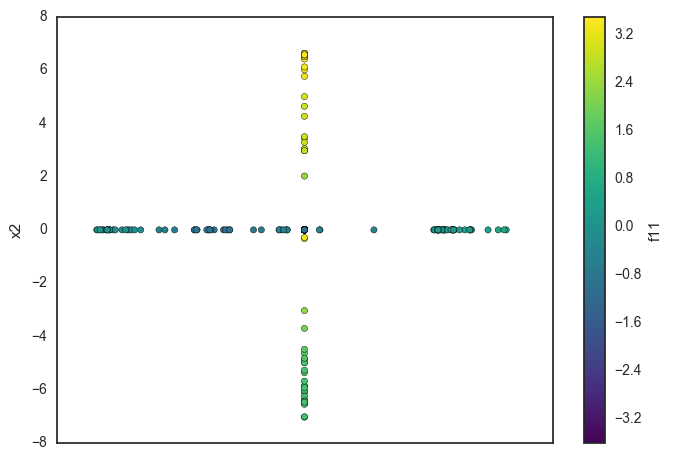

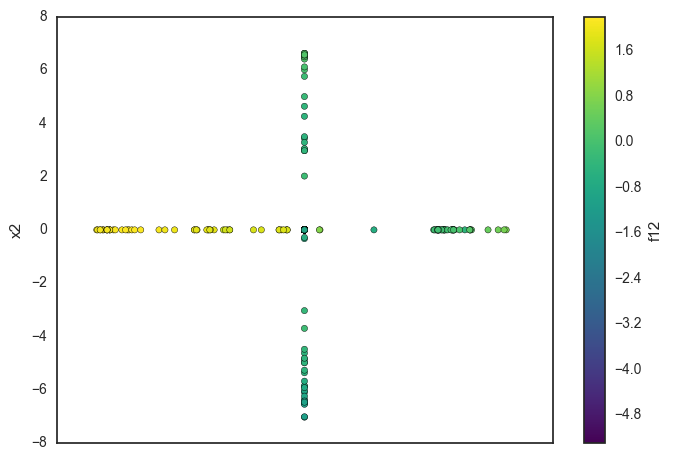

In [50]:
for i in x.columns:
    d_isomap.plot.scatter(x='x1', y='x2', c='f{}'.format(i), cmap='viridis')

### Hexbin Plot

<function __main__.plot_hexbin>

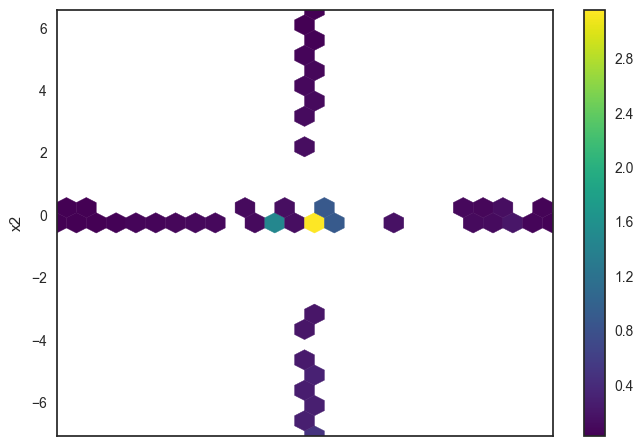

In [51]:
def plot_hexbin(gridsize, logscale, maximum):
    d_isomap.plot.hexbin(x='x1', y='x2', C='y',
                         bins='log' if logscale else None,
                         gridsize=gridsize,
                         reduce_C_function=np.max if maximum else np.mean,
                         cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

## t-SNE

Metoda t-SNE je založená na zachování lokální struktury dat za pomoci převodu na podmíněnou pravdepodobnost. Samotná projekce se snaží oddělit shluky podobných bodů skrze iterativní optimalizaci Kullback–Leibler divergence metodou gradientního sestupu.

In [52]:
tsne = TSNE(n_components=2, random_state=4)
x_reduced_tsne = pd.DataFrame(tsne.fit_transform(x))

In [53]:
print('rows, columns:', x_reduced_tsne.shape)
x_reduced_tsne.head()

rows, columns: (5000, 2)


,0,1
0,8.015786,0.974308
1,-15.550458,-4.015615
2,-12.205966,2.506591
3,-11.319984,8.145879
4,-9.752592,-5.779165


In [54]:
x_reduced_tsne.index = x.index
d_tsne = pd.concat([x_reduced_tsne, y, x], axis=1)
d_tsne.columns = ['x1', 'x2', 'y'] + ['f{}'.format(i) for i in x.columns]
d_tsne.head()

,x1,x2,y,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
42375,8.015786,0.974308,0.5058,-1.404955,-0.627701,0.864366,1.372616,0.326747,-0.209645,-0.850981,1.088529,1.133142,0.795277,-0.578043,-0.506667,0.324909
19419,-15.550458,-4.015615,4.3421,0.765024,-1.670540,0.864650,-1.764699,0.299671,-0.024820,-0.629304,0.507699,-1.495180,0.132764,-0.282931,-0.620093,-0.259886
21037,-12.205966,2.506591,3.9140,1.409905,0.840113,-0.153692,0.308910,-1.338128,0.176434,-1.175501,0.392030,0.362012,-1.190249,-0.135060,-1.061299,-0.750654
16641,-11.319984,8.145879,1.4063,-0.865640,0.436517,-1.363772,-0.319564,-1.041066,-0.846022,-1.468865,-0.536738,-0.147276,-1.009014,-1.071897,-1.479694,0.049790
32541,-9.752592,-5.779165,1.2011,-0.606758,-0.907059,-0.170736,1.104605,-0.509522,-1.107193,0.199504,-0.579647,1.269912,-0.763341,-0.775205,0.442924,-0.574385


### Scater plot

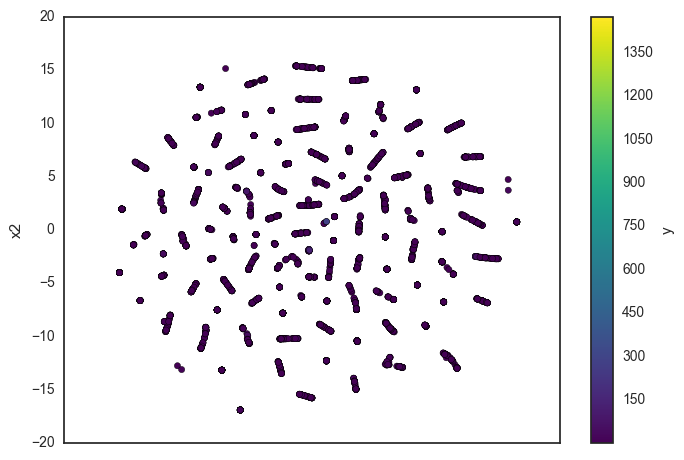

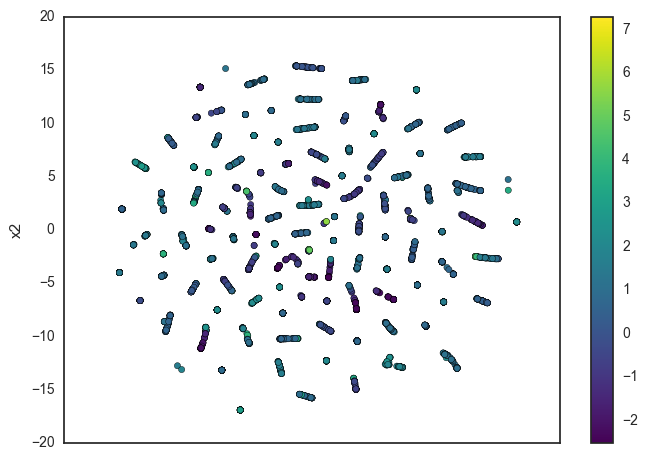

In [55]:
d_tsne.plot.scatter(x='x1', y='x2', c='y', cmap='viridis')
d_tsne.plot.scatter(x='x1', y='x2', c=d_tsne['y'].apply(log), cmap='viridis')

Níže je vizualizace závislosti hodnot featury (barva) na pozici v projekci pomocí Isomap.

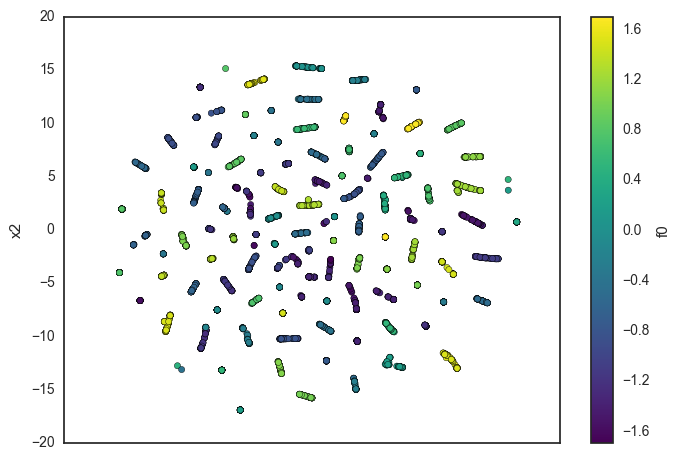

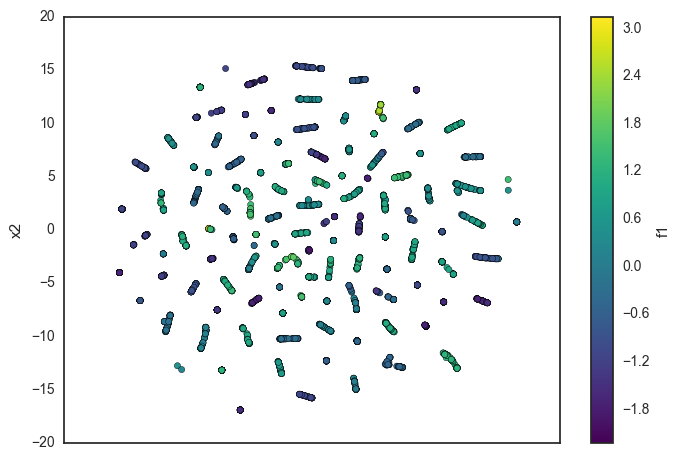

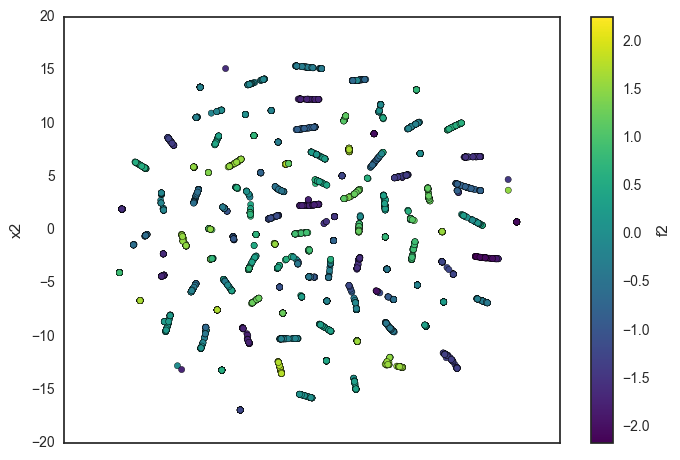

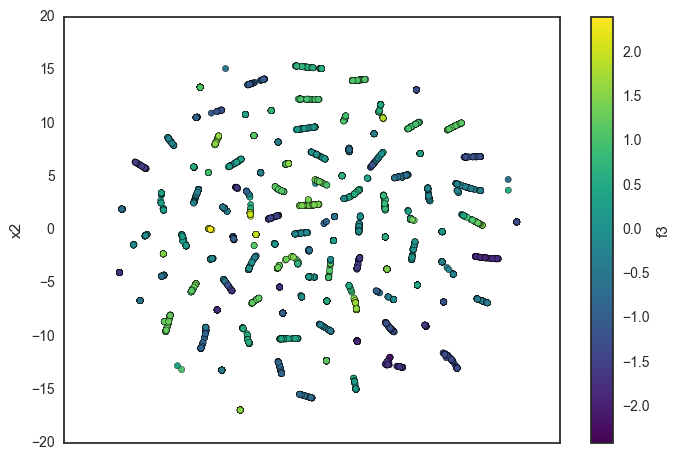

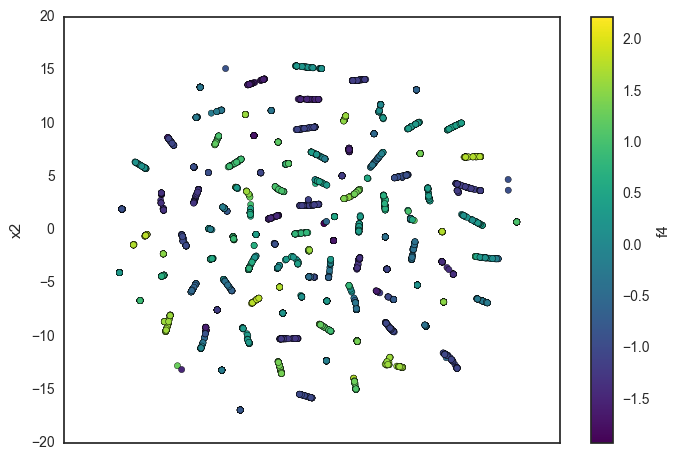

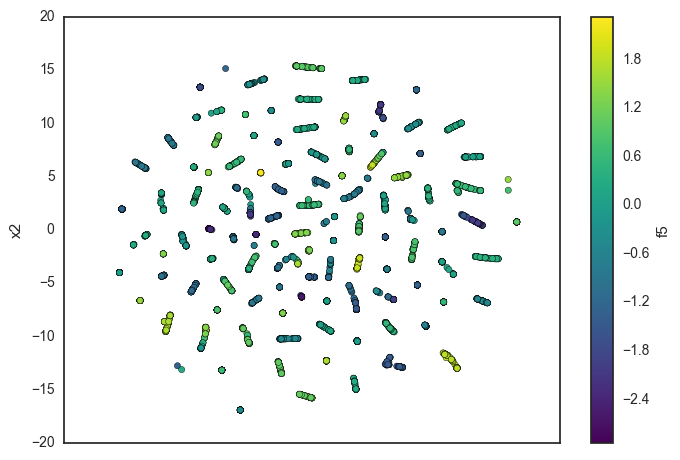

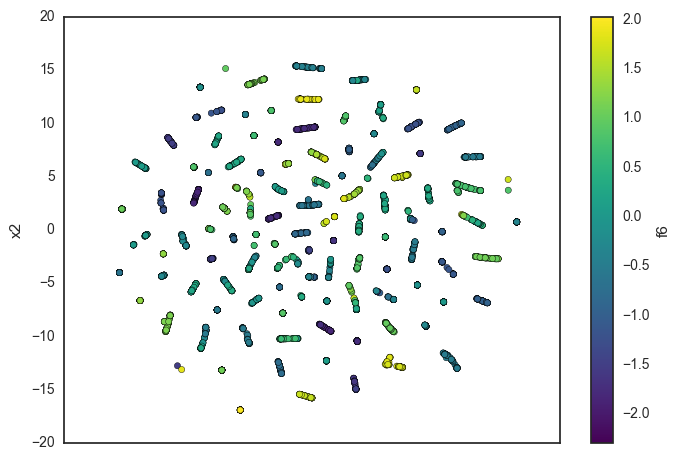

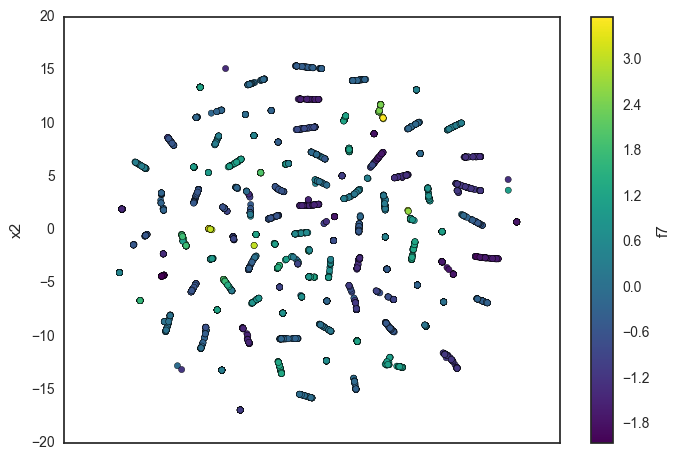

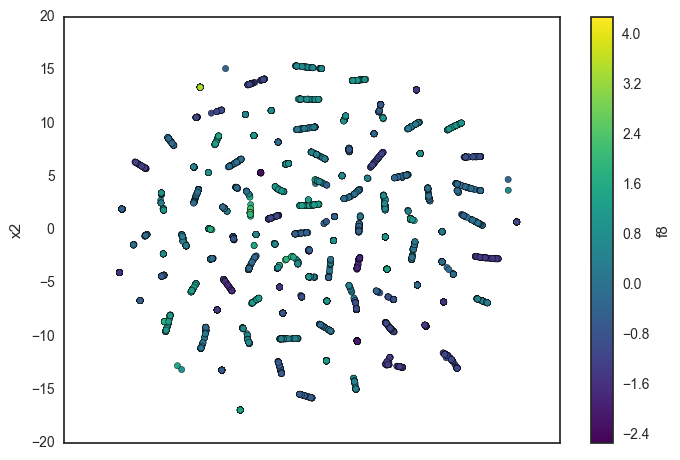

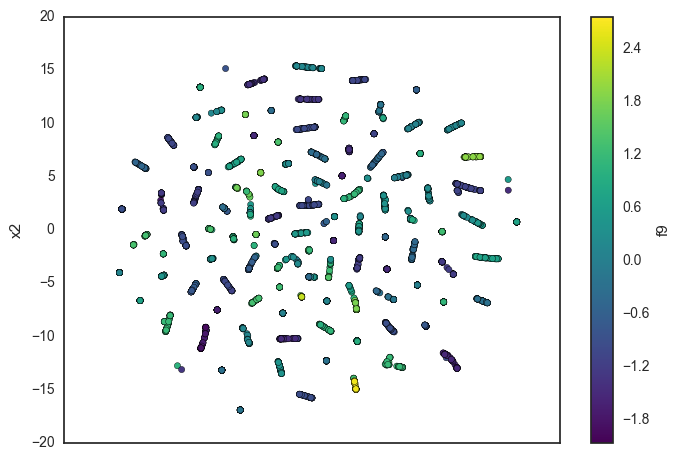

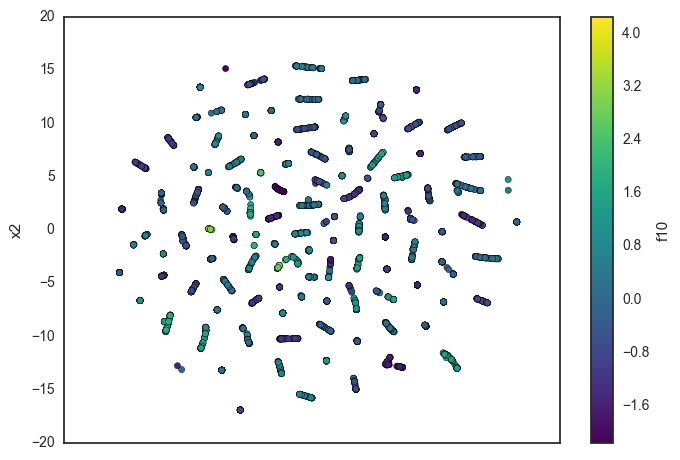

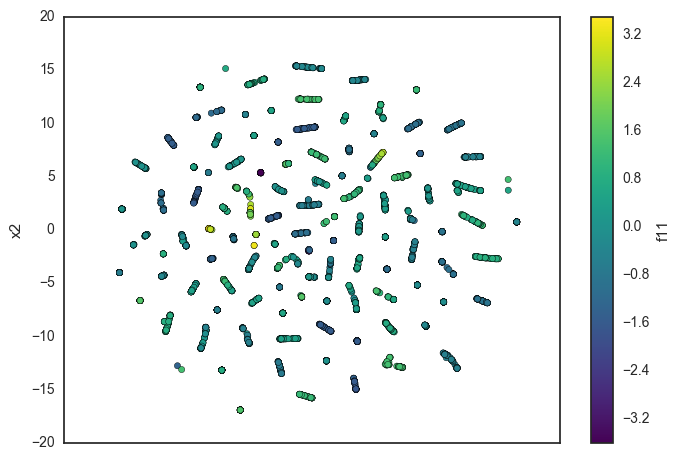

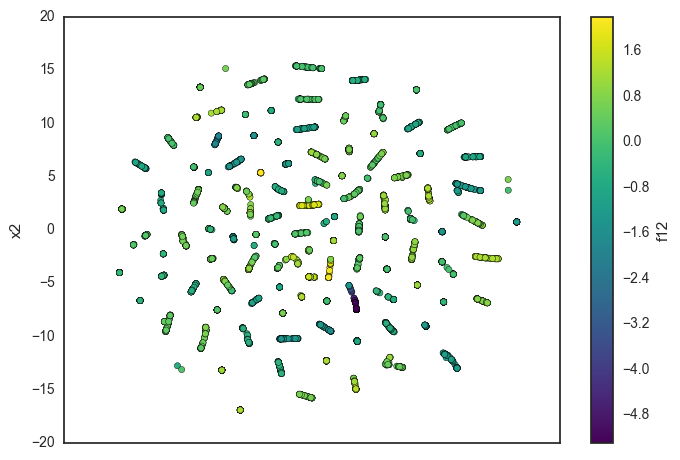

In [56]:
for i in x.columns:
    d_tsne.plot.scatter(x='x1', y='x2', c='f{}'.format(i), cmap='viridis')

<function __main__.plot_hexbin>

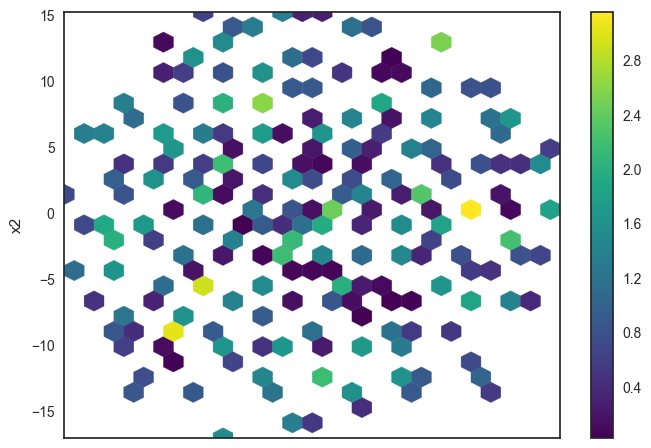

In [57]:
def plot_hexbin(gridsize, logscale, maximum):
    d_tsne.plot.hexbin(x='x1', y='x2', C='y',
                       bins='log' if logscale else None,
                       gridsize=gridsize,
                       reduce_C_function=np.max if maximum else np.mean,
                       cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

## Multi-dimensional Scaling

MDS je metoda nelineární redukce dimenze dat, která umisťuje data do nižší dimenze a zachovává při tom poměry vzdáleností k původní dimenzi. Postupuje iterativně tak, že snižuje odchylku původních a nových vzdáleností v každém kroku. V našem případě je metrikou klasická euklidovská vzdálenost.

In [8]:
# precomputation of euclidean distances
distances = euclidean_distances(d1_notscaled)

Pro zrychlení metody je potřeba předpočítat matici vzdáleností mezi každýma dvěma vstupními body.

In [9]:
# MDS fit
mds = MDS(n_components=2, max_iter=100, eps=1e-9, dissimilarity="precomputed", random_state=4)
pos = mds.fit(distances).embedding_
pos

array([[-0.3894066 ,  1.7613519 ],
       [-1.1616132 , -0.67117961],
       [-0.09157182, -1.81770047],
       ..., 
       [-0.06924198,  0.00484878],
       [ 0.68813596, -0.76329316],
       [-0.6589892 , -1.94052645]])

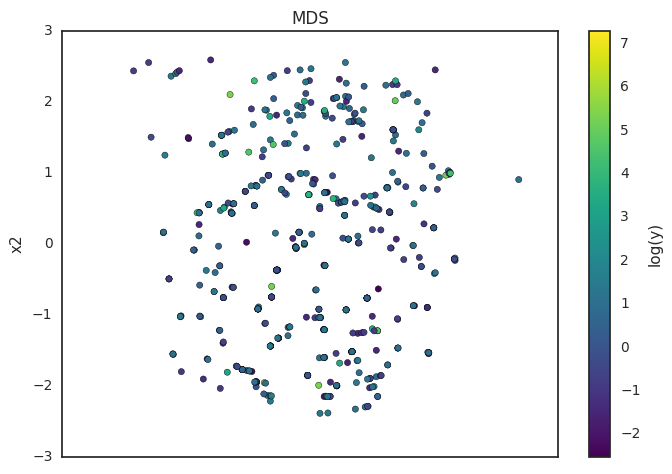

In [11]:
d = pd.concat([pd.DataFrame(pos), pd.Series(y_notscaled).apply(log)], axis=1)
d.columns = ['x1', 'x2', 'log(y)']
ax = d.plot.scatter(x='x1', y='x2',  c='log(y)', cmap='viridis')
ax.set(xlabel="x1", ylabel="x2")
ax.set_title('MDS')

plt.show()